# Teaching with Jupyter

In [4]:
%matplotlib nbagg
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from importlib import reload
from datetime import datetime
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [5]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

What is Jupyter?

* Browser based front end to an interpreter
* Supports Python, Julia, R, Terminal, ... (40 back ends)
* Can run lots and lots front-ends per kernel (amazing)
* Originally modeled on matlab notebook
* Based on notion of "cells"
* Cells can be text (markdown) or executable

What is RISE?

* Turns the cells of a Jupyter notebook into slide components
* Uses Reveal.js as its basic engine
* __However__ goes far beyond that, because slides are interpreted at __runtime__.
* Four roles that a cell can play:
    * New slide
    * Continuation of existing slide with reveal
    * Continuation of existing slide without reveal
    * Hidden (no slide)
    

What are its advantages for teaching?

* Code embedded in a slide can be executed
* Renders mathematics <B>beautifully</B>(MathJax)
* Python graphics (for example) are quite flexible

Drawbacks?

* slide layout is somewhat constrained

## Rendering Math and Linear Progression

Let ${\bf v_1} = \left[\begin{array}{r}1\\2\\3\end{array}\right], {\bf v_2} = \left[\begin{array}{r}4\\5\\6\end{array}\right],$ and ${\bf v_3} = \left[\begin{array}{r}2\\1\\0\end{array}\right].$

Let's determine (a) if the set $\{{\bf v_1, v_2, v_3}\}$ is linearly independent, and (b) if not, a linear dependence relation among them.

(a). Are $\{{\bf v_1, v_2, v_3}\}$ linearly independent?

We must determine if there is a nontrivial solution of the vector equation:
$$x_1{\bf v_1} + x_2{\bf v_2} + x_3{\bf v_3} = 0.$$

Let's row reduce the augmented matrix:

$$\left[\begin{array}{rrrc}1&4&2&0\\2&5&1&0\\3&6&0&0\end{array}\right] \sim 
\left[\begin{array}{rrrc}1&4&2&0\\0&-3&-3&0\\0&0&0&0\end{array}\right].$$

We can see that $x_1$ and $x_2$ are basic variables, and $x_3$ is free.  Each nonzero value of $x_3$ determines a nontrivial solution of the vector equation.  So $\{{\bf v_1, v_2, v_3}\}$ are linearly dependent.

(b). To find the linear dependence relation among ${\bf v_1, v_2,}$ and ${\bf v_3},$ we continue the row reduction to obtain the reduced echelon form:

$$\left[\begin{array}{rrrc}1&4&2&0\\2&5&1&0\\3&6&0&0\end{array}\right] \sim 
\left[\begin{array}{rrrc}1&4&2&0\\0&-3&-3&0\\0&0&0&0\end{array}\right] \sim
\left[\begin{array}{rrrc}1&0&-2&0\\0&1&1&0\\0&0&0&0\end{array}\right]$$

Which denotes the system of equations:

$$\begin{array}{rrrcl}x_1&&-2x_3&=&0\\&x_2&+x_3&=&0\\&&0&=&0\end{array}$$

So $x_1 = 2x_3, x_2 = -x_3,$ and $x_3$ is free.   

We can choose any nonzero value for $x_3$ -- say, $x_3 = 5$.  Then $x_1 = 10$ and $x_2 = -5$.  This gives us the solution:

$$ 10{\bf v_1} - 5{\bf v_2} + 5{\bf v_3} = {\bf 0}.$$

This is one (out of infinitely many) linear dependence relations among ${\bf v_1, v_2,}$ and ${\bf v_3}.$

## Python Graphics are Flexible

<IPython.core.display.Javascript object>


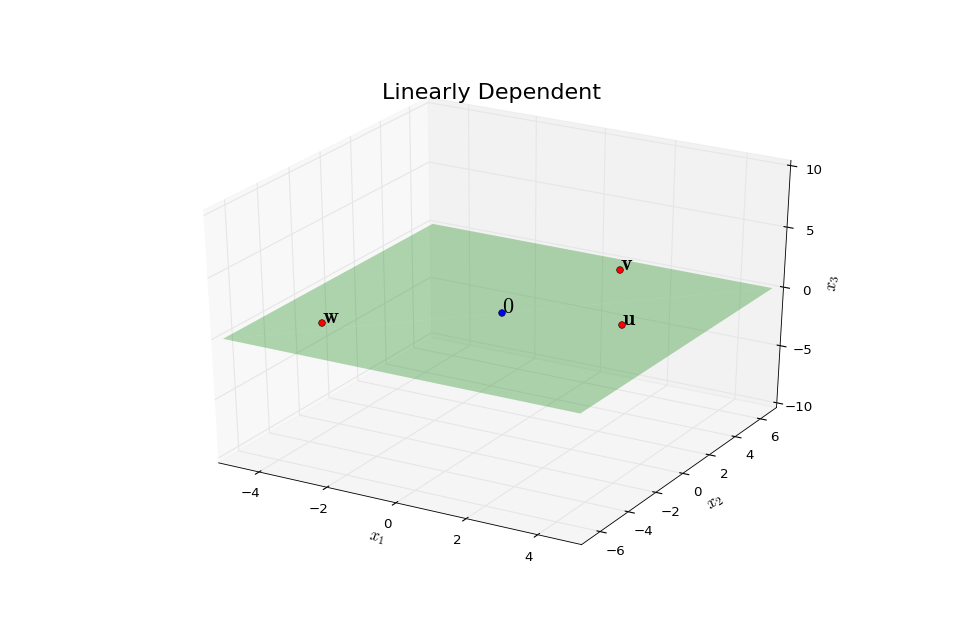

In [6]:
sl.hide_code_in_slideshow()
# %matplotlib qt
ax = ut.plotSetup3d(-5,5,-7,7,-10,10,figsize=(12,8))
u = np.array([3.0,1,0])
v = np.array([1.0,6,0])
w = -1.0*u -0.5*v
ax.text(u[0],u[1],u[2],r'$\bf u$',size=20)
ax.text(v[0],v[1],v[2],r'$\bf v$',size=20)
ax.text(w[0],w[1],w[2],r'$\bf w$',size=20)
#ax.text(1,-4,-10,r'Span{$\bf a_1,a_2,a_3$}',size=16)
ax.text(0,0,0,r'$\bf 0$',size=20)
# plotting the span of v
ut.plotSpan3d(ax,u,v,'Green')
ut.plotPoint3d(ax,u[0],u[1],u[2],'r')
ut.plotPoint3d(ax,v[0],v[1],v[2],'r')
ut.plotPoint3d(ax,w[0],w[1],w[2],'r')
ut.plotPoint3d(ax,0,0,0,'b')
# plotting the axes
#ut.plotIntersection3d(ax,[0,0,1,0],[0,1,0,0])
#ut.plotIntersection3d(ax,[0,0,1,0],[1,0,0,0])
#ut.plotIntersection3d(ax,[0,1,0,0],[1,0,0,0])
ax.set_title(r'Linearly Dependent',size=20)
# ax.mouse_init()
print('')

<IPython.core.display.Javascript object>


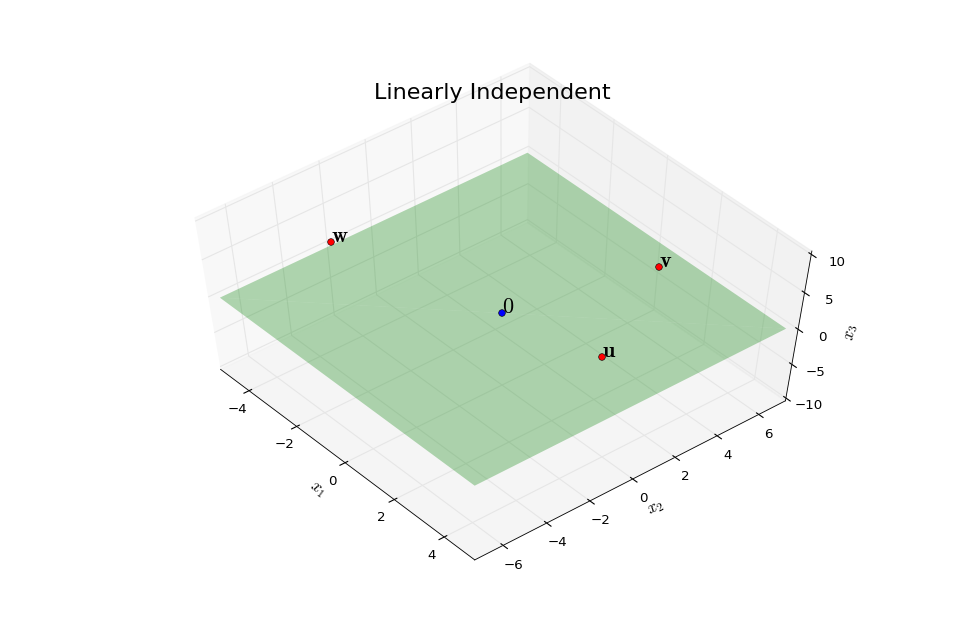

In [7]:
sl.hide_code_in_slideshow()
# %matplotlib qt
ax = ut.plotSetup3d(-5,5,-7,7,-10,10,figsize=(12,8))
u = np.array([3.0,1,0])
v = np.array([1.0,6,0])
w = -1.0*u -0.5*v + np.array([0.5,0,8.0])
ax.text(u[0],u[1],u[2],r'$\bf u$',size=20)
ax.text(v[0],v[1],v[2],r'$\bf v$',size=20)
ax.text(w[0],w[1],w[2],r'$\bf w$',size=20)
#ax.text(1,-4,-10,r'Span{$\bf a_1,a_2,a_3$}',size=16)
ax.text(0,0,0,r'$\bf 0$',size=20)
# plotting the span of v
ut.plotSpan3d(ax,u,v,'Green')
ut.plotPoint3d(ax,u[0],u[1],u[2],'r')
ut.plotPoint3d(ax,v[0],v[1],v[2],'r')
ut.plotPoint3d(ax,w[0],w[1],w[2],'r')
ut.plotPoint3d(ax,0,0,0,'b')
# plotting the axes
#ut.plotIntersection3d(ax,[0,0,1,0],[0,1,0,0])
#ut.plotIntersection3d(ax,[0,0,1,0],[1,0,0,0])
#ut.plotIntersection3d(ax,[0,1,0,0],[1,0,0,0])
ax.set_title(r'Linearly Independent',size=20)
# ax.mouse_init()
print('')

Notes:

* Code to generate figures, etc can be hidden from slideshow, only displaying output
* Slides are interpret at runtime -- changes can be made in mid-presentation
* Multiple front-ends per kernel is very powerful
* I have a makefile that converts notebooks to PDF notes 

## Images

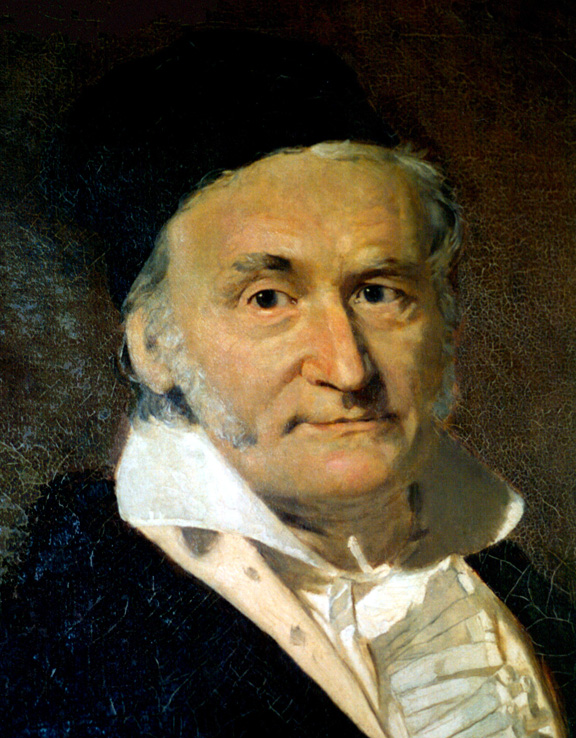

In [8]:
# image credit: http://en.wikipedia.org/wiki/Carl_Friedrich_Gauss#mediaviewer/File:Carl_Friedrich_Gauss.jpg
sl.hide_code_in_slideshow()
display(Image("images/Carl_Friedrich_Gauss.jpg", width=450))